# Hypothesis Testing

From lecture, we know that hypothesis testing is a critical tool in determing what the value of a parameter could be.

We know that the basis of our testing has two attributes:

**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_a$**

The tests we will discuss are:

* One Population Proportion
* Difference in Population Proportions
* One Population Mean
* Difference in Population Means

I will introduce some functions that are extremely useful when calculating a t-statistic and p-value for a hypothesis test.

Let's quickly review the following ways to calculate a test statistic for the tests listed above.

The equation is:

$$\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$ 



In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

### One Population Proportion

#### Research Question 

In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Population**: Parents with a teenager (age 13-18)  
**Parameter of Interest**: p  
**Null Hypothesis:** p = 0.52  
**Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

1018 Parents

56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

In [2]:
n = 1018
pnull = .52
phat = .56

x = sm.stats.proportions_ztest(phat * n, n, pnull)   # (test statistic, p-value)
# we can reject the null bc of p-value


In [3]:
x
# test statistic , Pvalue

(2.571067795759113, 0.010138547731721065)

Here P value of 0.010 < 0.05 So We reject the Null Hypotheses.
So we can reject the null hypothesis and say that now we believe that the population proportion of parents that believe electronics and social media were the cause of their teenagers' lack of sleep is definitely greater than .52 or 52%.

### Difference in Population Proportions

#### Research Question

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  
**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ 0  


91 out of 247 (36.8%) sampled parents of black children report that their child has had some swimming lessons.

120 out of 308 (38.9%) sampled parents of Hispanic children report that their child has had some swimming lessons.

In [4]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [5]:
sm.stats.ttest_ind(population1, population2)


(-0.6703254853834067, 0.5029301536346942, 553.0)

P value> Significant Value, we fail to reject the Null Hypotheses

In [6]:
# This example implements the analysis from the "Difference in Two Proportions" without using the sm.stats.ttest module

# Sample sizes
n1 = 247
n2 = 308

# Number of parents reporting that their child had some swimming lessons
y1 = 91
y2 = 120

# Estimates of the population proportions
p1 = round(y1 / n1, 2)
p2 = round(y2 / n2, 2)

# Estimate of the combined population proportion
phat = (y1 + y2) / (n1 + n2)

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * (1 / n1 + 1 / n2))

# Test statistic and its p-value
test_stat = (p1 - p2) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print(2*dist.norm.cdf(-np.abs(test_stat)))
print(dist.norm.cdf(2.5))
print(dist.norm.cdf(-2.5))
print(dist.norm.pdf(2.5))
print(dist.norm.pdf(-2.5))
# Print the test statistic its p-value
print("Test Statistic")
print(round(test_stat, 2))
print("\nP-Value")
print(round(pvalue, 2))

0.6295434573871281
0.9937903346742238
0.006209665325776132
0.01752830049356854
0.01752830049356854
Test Statistic
-0.48

P-Value
0.63


### One Population Mean

#### Research Question 

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

**Population**: All adults  
**Parameter of Interest**: $\mu$, population mean cartwheel distance.
**Null Hypothesis:** $\mu$ = 80
**Alternative Hypthosis:** $\mu$ > 80

25 Adults

$\mu = 82.46$

$\sigma = 15.06$

In [7]:
df = pd.read_csv("Cartwheeldata.csv")
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [8]:
n = len(df)
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
(n, mean, sd)

(25, 82.48, 15.058552387264855)

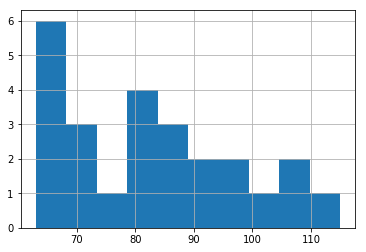

In [9]:
df["CWDistance"].hist()

In [10]:
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

In [11]:
import scipy as sp

In [12]:
sp.stats.mstats.ttest_1samp(df["CWDistance"], 80, axis=0)

Ttest_1sampResult(statistic=0.8234523266982029, pvalue=0.4183586657067718)

In [19]:
sp.stats.mstats.ttest_1samp?

### Difference in Population Means

#### Research Question 

Considering adults in the NHANES data, do males have a significantly different mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [9]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [10]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [11]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [12]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [13]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

(6.1755933531383205, 6.591544431126401e-10)

In [ ]:
Pvalue < alpha Reject the Null Hypothesis,


In [ ]:
df=pd.read_csv(input_data.csv)

df["new_col"]=df.apply(lamdbda x: 1 if "CALIFORNIA" in x.upper() else 0)
df.new_col.sum()